# Assignment 8

The Kozeny-Carmen (K-C) relationship is a model that relates porosity to permeability through a proportionality constant

$$
m \propto \frac{\phi^3}{(1 - \phi)^2} = f(\phi)
$$

The file [poro_perm.csv](poro_perm.csv) contains two columns of data corresponding to porosity and permeablity measurements for a reservoir.  Your assignment is to implement the `kc_model` member function below to return $f(\phi)$ as defined above.

I have already provided the code to read in the data file.  It stores the permeability and porosity as attributes of the class `KozenyCarmen` which you can use to implemenent `kc_model`.  Use NumPy *broadcasting* operations to make your code compact and readable.  `kc_model` should return a NumPy array.  The tests will fail if it returns a Python list or any other type of data structure.

For convience, I've implemented a `plot` member function so you can see the transformation of the data along with a fit to the Kozeny-Carmen model (and error bounds).  This is just for visualization purposes, you should not edit any code in this member funtion.  If `kc_model` is implemented correctly, it should return a plot that looks like

![img](images/kc.png)

If you'd like to produce this plot in the notebook, simply run

```python
KozenyCarmen('poro_perm.csv').plot()
```

in a code cell.

In [60]:
import numpy as np
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt

class KozenyCarmen():
    
    def __init__(self, filename):
        
        #This reads a filename that is passed as an argument during
        #class instantiation and stores the columns of the data as
        #class attributes porosity and permeability
        [self.porosity, self.permeability] = np.loadtxt(filename, 
                                                        delimiter=',', 
                                                        skiprows=1, 
                                                        unpack=True)
        
        return
    
    def kc_model(self):
        #This function should return f(ϕ) as defined above
        x = np.array(self.porosity)
        #y = np.array(self.permeability)
        #ts = np.array([x, y])
        kc = (x ** 3) / ((1 - x) ** 2)
        return kc
    
    def plot(self):
        #Does not need to change if kc_model() is implemented properly
        fig, ax = plt.subplots(figsize=(8,6))
        sns.regplot(self.kc_model(), self.permeability, ax=ax);
        ax.set_xlabel(r'$\frac{\phi^3}{(1 - \phi)^2}$')
        ax.set_ylabel(r'$\kappa$ (mD)')
        ax.set_xlim([0, 0.0125])
        ax.legend(['Model Fit', 'Transformed Data'])

In [61]:
test = KozenyCarmen(filename = "poro_perm.csv")

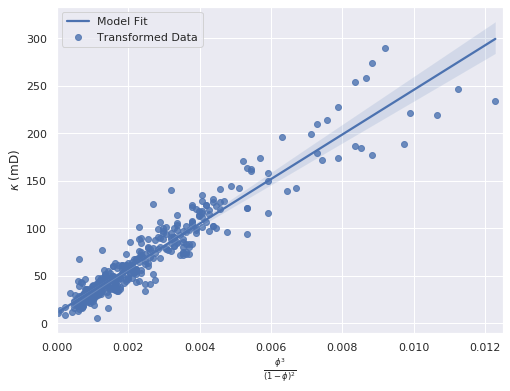

In [62]:
test.plot()